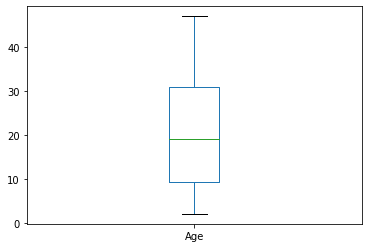

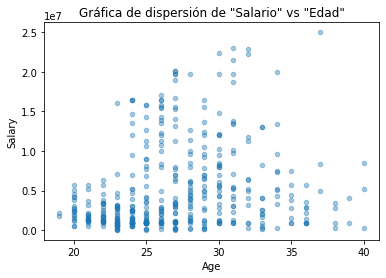

In [3]:
#1.Cargar e inspeccionar el dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

archivo = 'https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv'
df = pd.read_csv(archivo)

df.isna().sum()
df.dtypes
df.describe()
df['Age'].value_counts()
df["Age"].value_counts().plot(kind = "box")
df.plot(kind="scatter", y = "Salary", x = "Age", title = "Gráfica de dispersión de \"Salario\" vs \"Edad\"", alpha = 0.4)

In [4]:
#2.Eliminar las filas que tengan el salario nulo y la columna number, ya que esta no tiene ninguna relevancia

dfiltrados=df.dropna(subset=['Salary'])
dfiltrados=dfiltrados.drop(['Number'], axis=1)

In [5]:
#3.Convertir la estatura de pies-pulgadas a centímetros.

aux=dfiltrados['Height'].str.split('-')
dfiltrados['Height'] = [30.48*float(altura[0])+2.5*float(altura[1]) for altura in aux]

<BarContainer object of 5 artists>

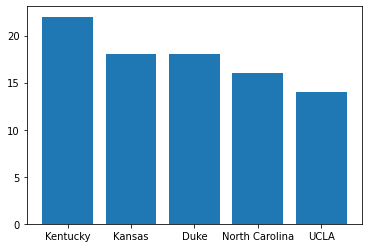

In [6]:
#4.Construir un histograma con las cinco universidades con mas jugadores en la NBA

import matplotlib.pyplot as plt

universidades = dfiltrados["College"].value_counts()[:5].keys()
estudiantes = dfiltrados["College"].value_counts()[:5]

plt.bar(universidades,estudiantes)


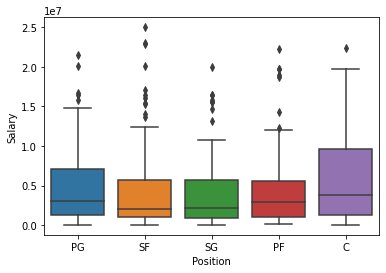

In [7]:
#5.Construir un boxplot en el que se muestre los salarios vs las posiciones de los jugadores. Esto permite entender si los salarios varian significativamente dependiendo de la posición

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Position",y="Salary", data=dfiltrados)



In [8]:
#6.Obtener los cinco equipos que pagan los salarios mas altos (sumando toda la nómina de sus jugadores)

import seaborn as sns
import matplotlib.pyplot as plt
Equipos=dfiltrados['Salary'].groupby([dfiltrados['Team']]).sum().sort_values(ascending = False)[1:5]

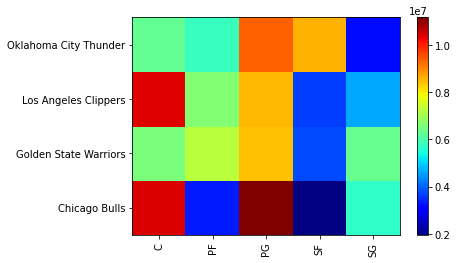

In [9]:
#7.Construir una tabla pivot que muestre el salario promedio de los jugadores por equipo y posición para para los cinco equipos que pagan mejores salarios. Construir una representación visual de la información anterior usando heatmap.

indices = [i for i in range(len(dfiltrados)) if dfiltrados.iloc[i,1] in Equipos.keys()]
datos5Equipos = dfiltrados.iloc[indices,:]
SalarioEquipoPosición=datos5Equipos[['Salary','Team','Position']]
SalarioEquipoPosiciónAgrupados=SalarioEquipoPosición.groupby(['Team','Position'],as_index = False).mean().sort_values(by = "Salary", ascending = False)
SalarioEquipoPosiciónAgrupados
grouped_pivot = SalarioEquipoPosiciónAgrupados.pivot(index = 'Team', columns = 'Position')
grouped_pivot = grouped_pivot.fillna(0)

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='jet')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [10]:
#8.Utilizar el método scatter_matrix para visualizar si existe algún tipo de correlación entre las variables numérocas del dataset

from pandas.plotting import scatter_matrix
attributes = ["Age","Height","Weight","Salary"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd442354210>,
      dtype=object)

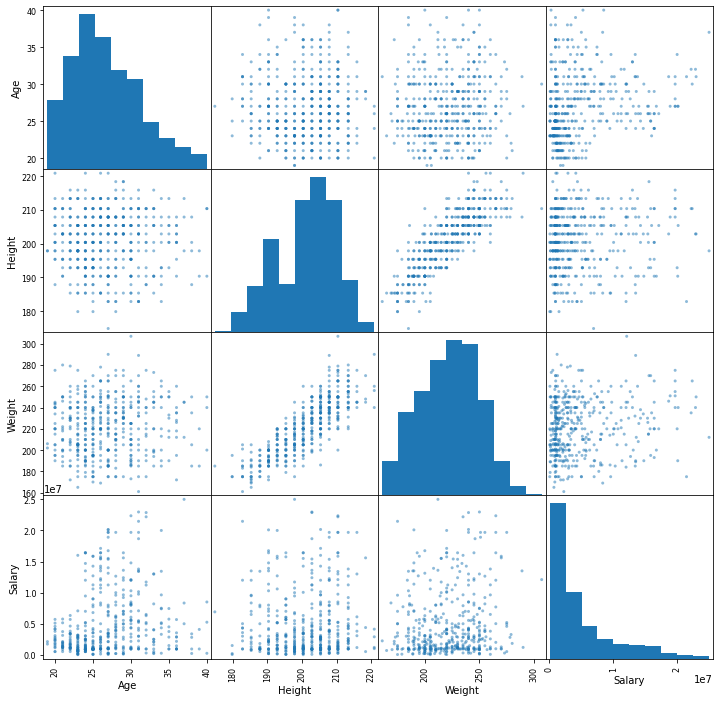

In [11]:
#9.Corroborar los resultados anteriores calculando los coeficientes de correlación de Pearson para las variables numéricas del dataset

corr_p = dfiltrados[["Age","Height","Weight","Salary"]].corr(method = "pearson")
corr_p

scatter_matrix(dfiltrados[attributes], figsize=(12, 12))


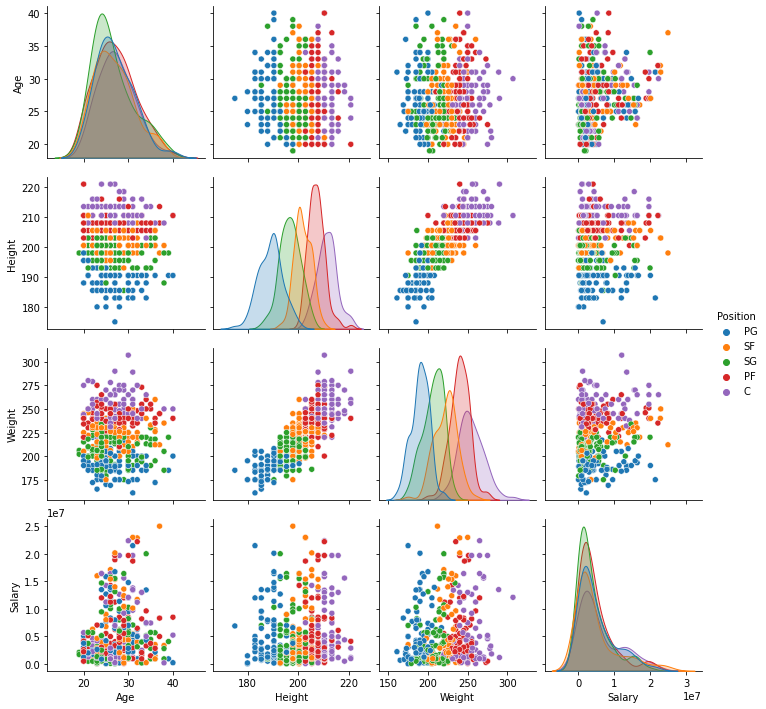

In [12]:

#10.Usar el método pairplot para evaluar visualizar si existe dependencia entre algunas de las variables numéricas y la posición de los jugadores.

import seaborn as sns
sns.pairplot(dfiltrados, hue = "Position", vars = ["Age","Height","Weight","Salary"])